In [1]:
import numpy as np
import pandas as pd

In [37]:
oncesi = pd.DataFrame([123, 119, 119, 116, 123, 123, 121, 120, 117, 118,
                       121, 121, 123, 119, 121, 118, 124, 121, 125,
                       115, 115, 119, 118, 121, 117, 117, 120, 120, 121,
                       117, 118, 117, 123, 118, 124, 121, 115, 118, 125, 115])

sonrasi = pd.DataFrame([118, 127, 122, 132, 129, 123, 129, 132, 128, 130, 128, 138,
                        140, 130, 134, 134, 124, 140, 134, 129, 129, 138, 134, 124,
                        122, 126, 133, 127, 130, 130, 130, 132, 117, 130, 125, 129,
                        133, 120, 127, 123])

In [38]:
# BIRINCI VERI SETI (AYRIK VERI SETIDIR)
AYRIK = pd.concat([oncesi, sonrasi], axis=1)
AYRIK.columns = ["ONCESI", "SONRASI"]
print("AYRIK veri seti: \n\n", AYRIK.head(), '\n\n')

AYRIK veri seti: 

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 




In [39]:
# IKINCI VERI SETI (BIRLESIK VERI SETIDIR)
# ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"

In [40]:
# FLAG ve ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis=1)

In [41]:
# SONRASI FLAG_TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

In [42]:
# FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis=1)

In [43]:
# TUM VERIYI BIR ARAYA GETIRME
BIRLESIK = pd.concat([A, B])
BIRLESIK

,0,0
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI
...,...,...
35,129,SONRASI
36,133,SONRASI
37,120,SONRASI
38,127,SONRASI


In [44]:
# ISIMLENDIRME
BIRLESIK.columns = ["PERFORMANS", "ONCESI_SONRASI"]
print("BIRLESIK Veri seti: \n\n", BIRLESIK.head(), "\n")

BIRLESIK Veri seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



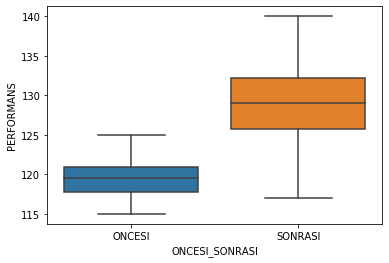

In [45]:
# boxplot
import seaborn as sns
sns.boxplot(x="ONCESI_SONRASI", y="PERFORMANS", data=BIRLESIK)

In [49]:
# Varsayim kontrolleri
from scipy.stats import shapiro

print(shapiro(AYRIK.ONCESI))
# H0 reddedilemiyor

print(shapiro(AYRIK.SONRASI))
# H0 reddedilemiyor

(0.9543654918670654, 0.10722342133522034)
(0.9780087471008301, 0.6159457564353943)


In [55]:
from scipy import stats

stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)
# H0 red (simdilik gozardı ediliyor.)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [59]:
# Hipotez testi
test_istatistigi, pvalue = stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)
print("test istatistigi: %.4f , p-value: %.4f" %(test_istatistigi, pvalue))

test istatistigi: -9.2815 , p-value: 0.0000


In [62]:
# Nonparametrik bağımli iki örneklem testi
test_istatistigi, pvalue = stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)
print("test istatistigi: %.4f , p-value: %.4f" %(test_istatistigi, pvalue))

test istatistigi: 15.0000 , p-value: 0.0000
